#imports

In [ ]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

#Loading images
!attention: we should upload images before running in colab's content. because it will be automatically deleted after disconnection.

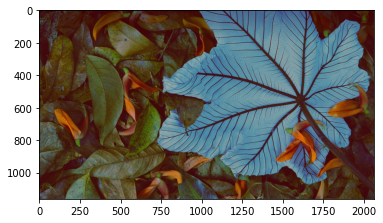

In [34]:
image = cv2.imread('/content/Cecropia.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

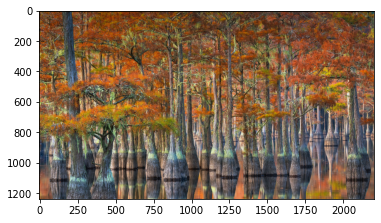

In [35]:
image_ref = cv2.imread('/content/GeorgiaCypress.jpg')
image_ref = cv2.cvtColor(image_ref, cv2.COLOR_BGR2RGB)
plt.imshow(image_ref)

In [36]:
#calculating the histogram of the input image:
def Hist(image):

    h, w = image.shape
    img_hist = np.zeros((256))
    for i in range(h):
        for j in range(w):
            img_hist[image[i,j]] += 1
    #nirmalizing:
    img_hist = img_hist/(h*w)
    return img_hist

In [39]:
#calculating CDF:
def cum_sum(img_hist):

    #cdf = img_hist.copy()
    cdf =  [sum(img_hist[:i+1]) for i in range(len(img_hist))]
    #cdf = cdf.round(decimals=3)
    return cdf

In [ ]:
def hist_matching(cdf_ref, cdf_img):
  new_cdf = np.zeros((256))
  for i in range(256):
    ind = np.where(np.logical_and(cdf_ref>=cdf_img[i]-0.003, cdf_ref<=cdf_img[i]+0.003))[0]
    new_cdf[ind] = cdf_img[i]

  return new_cdf


In [68]:
#recreating the image:
def Rec(image, new_cdf):
  h, w = image.shape
  img_copy = image.copy()
  for i in range(h):
          for j in range(w):
             img_copy[i,j] = np.uint8(new_cdf[img_copy[i,j]] * 255)

  return img_copy

In [69]:
hist_img_org = np.zeros((3, 256))
hist_img_ref = np.zeros((3, 256))
cdf_org = np.zeros((3, 256))
cdf_ref = np.zeros((3, 256))
new_cdf = np.zeros((3, 256))

h, w = image[:, :, 0].shape
new_img = np.zeros((h, w, 3))

for k in range(3):
  hist_img_org[k, :] = Hist(image[:, :, k])
  hist_img_ref[k, :] = Hist(image_ref[:, :, k])
  cdf_org[k, :] = cum_sum(hist_img_org[k, :])
  cdf_ref[k, :] = cum_sum(hist_img_ref[k, :])
  new_cdf[k, :] = hist_matching(cdf_ref[k, :], cdf_org[k, :])
  new_img[:, :, k] = Rec(image[:, :, k], new_cdf[k, :])


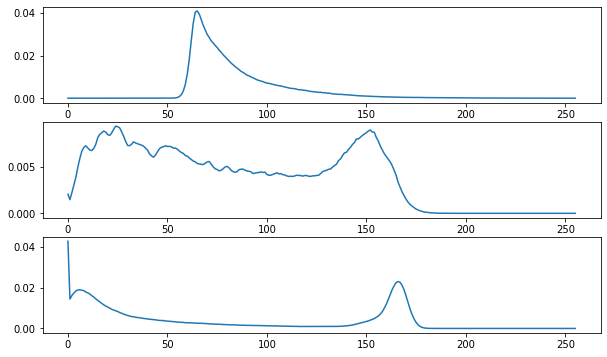

In [70]:
#histogram of original image:
fig, axs = plt.subplots(3, figsize=(10,6))
x = np.array(range(0, 256))
#plt.title('histogram of the original imag')
axs[0].plot(x, hist_img_org[0, :])
axs[1].plot(x, hist_img_org[1, :])
axs[2].plot(x, hist_img_org[2, :])


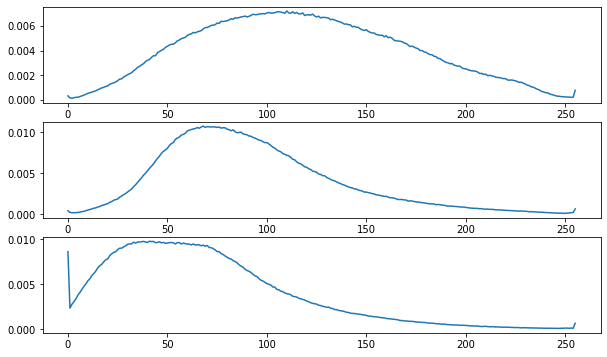

In [71]:
#histogram of original image-ref:
fig, axs = plt.subplots(3, figsize=(10,6))
x = np.array(range(0, 256))
#plt.title('histogram of the original imag')
axs[0].plot(x, hist_img_ref[0, :])
axs[1].plot(x, hist_img_ref[1, :])
axs[2].plot(x, hist_img_ref[2, :])

In [75]:
#plt.imshow(new_img)
cv2.imwrite('result-02.jpg', new_img)

True

In [73]:
from google.colab.patches import cv2_imshow

In [74]:
!curl -o logo.png https://colab.research.google.com/img/colab_favicon_256px.png
import cv2
#plt.imshow(im)
cv2_imshow(new_img)

Output hidden; open in https://colab.research.google.com to view.

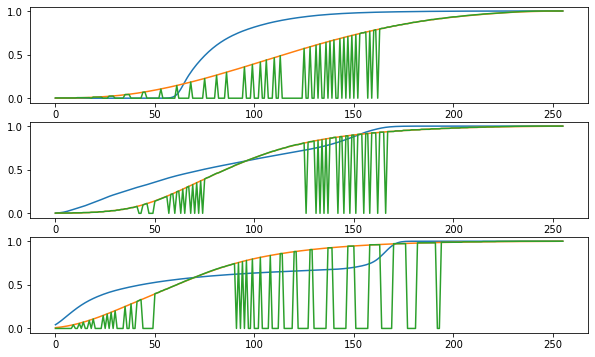

In [76]:
fig, axs = plt.subplots(3, figsize=(10,6))
x = np.array(range(0, 256))
axs[0].plot(x, cdf_org[0, :], x, cdf_ref[0, :], x, new_cdf[0,:])
axs[1].plot(x, cdf_org[1, :], x, cdf_ref[1, :], x, new_cdf[1,:])
axs[2].plot(x, cdf_org[2, :], x, cdf_ref[2, :], x, new_cdf[2,:])
plt.show()

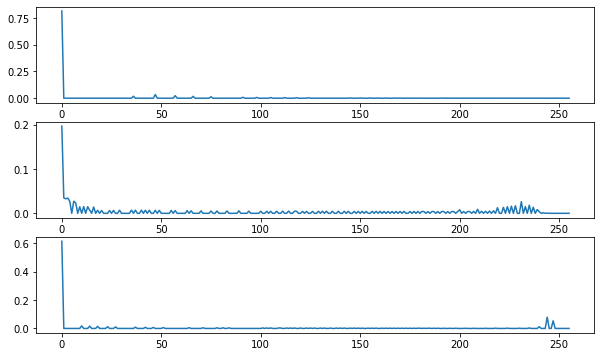

In [77]:
#histogram of the new image:
hist_img_new = np.zeros((3, 256))
new_img = new_img.astype(np.uint8)
new_img[new_img < 0] = 0
new_img[new_img > 255] = 255
for k in range(3):
  hist_img_new[k, :] = Hist(new_img[:, :, k])
fig, axs = plt.subplots(3, figsize=(10,6))
x = np.array(range(0, 256))
#plt.title('histogram of the original imag')
axs[0].plot(x, hist_img_new[0, :])
axs[1].plot(x, hist_img_new[1, :])
axs[2].plot(x, hist_img_new[2, :])
plt.savefig('result-01.jpg')